<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/ALURA_QuarentenaDados_AULA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Importa a biblioteca Pandas
import pandas as pd

In [2]:
#@title Lê o dataset(CSV) dos filmes.

df_filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
df_filmes.columns = ['filmeId', 'Titulo', 'Generos']
df_filmes.head()

,filmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_filmes.info(), df_filmes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   Titulo   9742 non-null   object
 2   Generos  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


(None,              filmeId
 count    9742.000000
 mean    42200.353623
 std     52160.494854
 min         1.000000
 25%      3248.250000
 50%      7300.000000
 75%     76232.000000
 max    193609.000000)

In [4]:
#@title Lê o dataset(CSV) de avaliações dos filmes.
df_notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
df_notas.columns = ['usuarioId', 'filmeId', 'Avaliacao', 'Momento']
df_notas.head()

,usuarioId,filmeId,Avaliacao,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_notas.info(), df_notas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   Avaliacao  100836 non-null  float64
 3   Momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


(None,            usuarioId        filmeId      Avaliacao       Momento
 count  100836.000000  100836.000000  100836.000000  1.008360e+05
 mean      326.127564   19435.295718       3.501557  1.205946e+09
 std       182.618491   35530.987199       1.042529  2.162610e+08
 min         1.000000       1.000000       0.500000  8.281246e+08
 25%       177.000000    1199.000000       3.000000  1.019124e+09
 50%       325.000000    2991.000000       3.500000  1.186087e+09
 75%       477.000000    8122.000000       4.000000  1.435994e+09
 max       610.000000  193609.000000       5.000000  1.537799e+09)

In [6]:
#@title Cria a coluna de avaliações e exibe pelo valor da avaliação em ordem decrescente.
media_notas_filmes = df_notas.groupby('filmeId')['Avaliacao'].mean()
df_filmes_notas_media = df_filmes.join(media_notas_filmes, on='filmeId')
df_filmes_notas_media.sort_values('Avaliacao', ascending=False)

,filmeId,Titulo,Generos,Avaliacao
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


## Desafio 1: Encontrar os filmes não avaliados. [Paulo Silveira](https://twitter.com/paulo_caelum)

In [7]:
#@title Exibe os filmes sem avaliação.
df_filmes_notas_media[pd.isna(df_filmes_notas_media['Avaliacao'])]

,filmeId,Titulo,Generos,Avaliacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2: Renomear a coluna 'rating' do DataFrame gerado com as médias para 'Notas Médias'. [Guilherme Silveira](https://twitter.com/guilhermecaelum)

In [8]:
#@title Renomeia as colunas.
df_filmes_notas_media.columns = ['filmeId', 'Titulo', 'Genero', 'AvaliacaoMedia']
df_filmes_notas_media.head()

,filmeId,Titulo,Genero,AvaliacaoMedia
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3: Criar uma coluna com a quantidade de avaliações de cada filme. [Guilherme Silveira](https://twitter.com/guilhermecaelum)

In [9]:
#@title Conta e cria a coluna com a quantidade de avaliações de cada filme.
qtd_avaliacao_filme = df_notas.groupby('filmeId')['Avaliacao'].count()
df_filmes_notas_media = df_filmes_notas_media.join(qtd_avaliacao_filme, on='filmeId')
df_filmes_notas_media.head()

,filmeId,Titulo,Genero,AvaliacaoMedia,Avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4: Arredondar avaliações para 2 decimais. [Thiago Gonçalves](https://twitter.com/tgcsantos)

In [10]:
#@title Arredonda a média das avaliações para 2 decimais.
df_filmes_notas_media.columns = ['filmeId', 'Titulo', 'Genero', 'AvaliacaoMedia', 'Qtd_avaliacoes']
df_filmes_notas_media['AvaliacaoMedia'] = df_filmes_notas_media['AvaliacaoMedia'].round(2)
df_filmes_notas_media.head()

,filmeId,Titulo,Genero,AvaliacaoMedia,Qtd_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5: Descobrir os gêneros únicos (Quais são eles?). [Allan Spadini](https://twitter.com/allanspadini)

In [11]:
#@title A lista de 19 gêneros base que compõem a classificação do dataset
grp_filmes_genero = df_filmes_notas_media.groupby('Genero').nunique()
lst_generos = []
for gen in grp_filmes_genero.index:
  genero = gen.split('|')
  for g in list(genero):
    lst_generos.append(g) if g not in list(lst_generos) else ''

print(*lst_generos, sep='\n')

(no genres listed)
Action
Adventure
Animation
Children
Comedy
Fantasy
IMAX
Romance
Sci-Fi
Western
Crime
Mystery
Thriller
Drama
Horror
Film-Noir
Documentary
War
Musical


## Desafio 6: Contar a quantidade de filmes agrupados por gênero. [Thais André](https://twitter.com/thais_tandre)

In [12]:
#@title Contagem de títulos por classificação composta.
df_grp_generos = df_filmes_notas_media.groupby('Genero').count().drop(['filmeId', 'AvaliacaoMedia','Qtd_avaliacoes'], axis=1, inplace=False)
df_grp_generos.head()

,Titulo
Genero,
(no genres listed),34
Action,60
Action|Adventure,32
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,6


### Desafio 7: Plotar a distribuição de filmes por gênero. [Guilherme Silveira](https://twitter.com/guilhermecaelum)

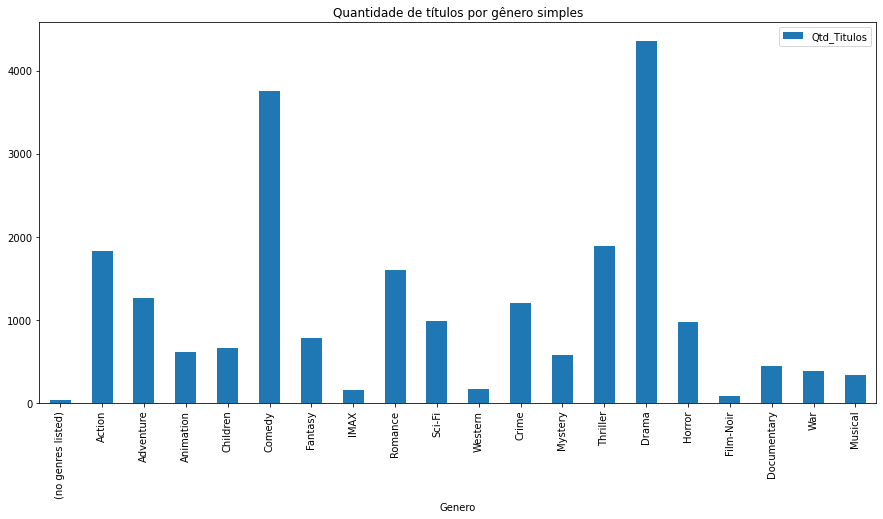

In [20]:
#@title Pelo fato de serem mais de 900 gêneros compostos, o gráfico abaixo contém a contagem de ocorrências dos gêneros simples na classificação composta do dataset. Sendo assim, um único título pode ter sido contabilizado várias vezes.
df_freq_generos = pd.DataFrame(columns=['Genero', 'Qtd_Titulos'])

for i, gen in enumerate(lst_generos):
  freq_gen = 0
  for row, genero in df_grp_generos.iterrows():
    if gen in row:
      freq_gen += genero['Titulo']
  df_freq_generos.loc[i, 'Genero'] = gen
  df_freq_generos.loc[i,'Qtd_Titulos'] = freq_gen

df_freq_generos.plot('Genero','Qtd_Titulos', kind='bar', figsize=(15,7), title='Quantidade de títulos por gênero simples')